<a href="https://colab.research.google.com/github/susanaescamilla679-coder/Estadistica2025B/blob/main/PROYECTOUNIDAD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

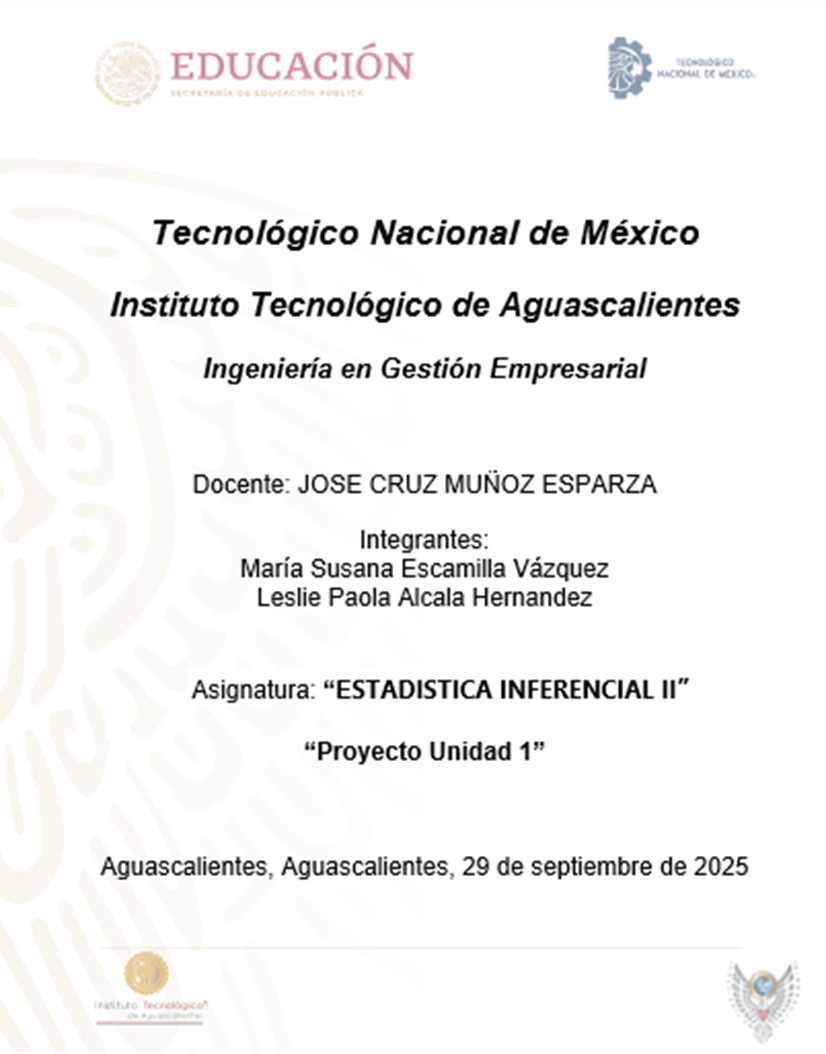

# **Introducción**
Se tiene como objetivo estudiar la relación entre las horas de estudio de un estudiante y su puntaje en un examen. Se busca determinar si existe una correlación significativa entre ambas variables y comprobar si la relación puede explicarse mediante un modelo de regresión lineal.

In [ ]:
import pandas as pd
# Cargar datos del CSV
df = pd.read_csv("https://raw.githubusercontent.com/leslie1506/Estadistica2025B/refs/heads/main/student_exam_scores.csvv")
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


# **Hipótesis**
-Hipótesis nula (H₀): No existe relación lineal significativa entre las horas de estudio y las calificaciones.

-Hipótesis alternativa (H₁): Sí existe una relación lineal significativa entre las horas de estudio y las calificaciones.

In [ ]:
# Establezca la variable dependiente (Y) y la independiente (X)
x = df["hours_studied"]
y = df["exam_score"]

# **Marco teórico**
La teoría de la regresión lineal simple establece que, cuando dos variables están relacionadas, es posible ajustar una recta que prediga el comportamiento de la variable dependiente (Scores) a partir de la variable independiente (Hours). Además, el coeficiente de correlación de Pearson mide la fuerza y dirección de la relación lineal.


# **Metodología**

1. Se cargaron los datos desde el archivo CSV.

2. Se identificaron las variables: Hours como variable independiente (X) y Scores como dependiente (Y).

3. Se realizaron gráficos de dispersión y de regresión lineal.

4. Se calcularon coeficientes de correlación, de determinación (R²) y parámetros del modelo.

5. Se evaluó la normalidad de los residuales con la prueba de Shapiro-Wilk y la homocedasticidad con la prueba de Breusch-Pagan.

6. Se realizaron predicciones de ejemplo y un análisis ANOVA.

7. Se visualizó la matriz de correlación mediante un mapa de calor.

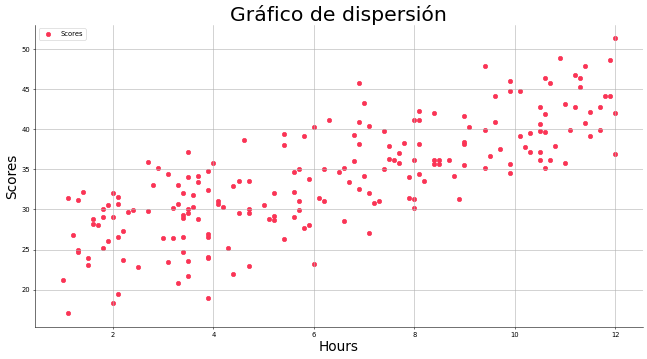

In [ ]:
#Gráfico de dispersión

import matplotlib.pyplot as plt
plt.figure(figsize=(16,8), dpi=49)
plt.scatter(x, y, label="Scores", color="#FA3455", s=40)
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Scores", fontsize=20)
plt.title("Gráfico de dispersión", color="black", fontsize=30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
plt.show()

# **Resultados**

-Se obtuvo un coeficiente de correlación positivo y cercano a 1, lo que indica una relación lineal fuerte entre horas de estudio y calificación.

-El coeficiente de determinación R² mostró que gran parte de la variabilidad en los puntajes se explica por las horas de estudio.

-Las pruebas estadísticas confirmaron la normalidad de los residuales y la homocedasticidad del modelo.

-El ANOVA indicó que la relación entre las variables es estadísticamente significativa.

Coeficiente de correlación = 0.7768
Coeficiente de correlación (forma fácil)=                     hours_studied  sleep_hours  attendance_percent  \
hours_studied            1.000000     0.077864           -0.031311   
sleep_hours              0.077864     1.000000            0.000572   
attendance_percent      -0.031311     0.000572            1.000000   
previous_scores          0.069078    -0.194251            0.051958   
exam_score               0.776751     0.188222            0.225713   

                    previous_scores  exam_score  
hours_studied              0.069078    0.776751  
sleep_hours               -0.194251    0.188222  
attendance_percent         0.051958    0.225713  
previous_scores            1.000000    0.431105  
exam_score                 0.431105    1.000000  
Coeficiente de correlación: PearsonRResult(statistic=np.float64(0.7767514349789608), pvalue=np.float64(1.2719809567612592e-41))
Coeficiente de determinación: 0.6033427917418747
Parámetros: const       

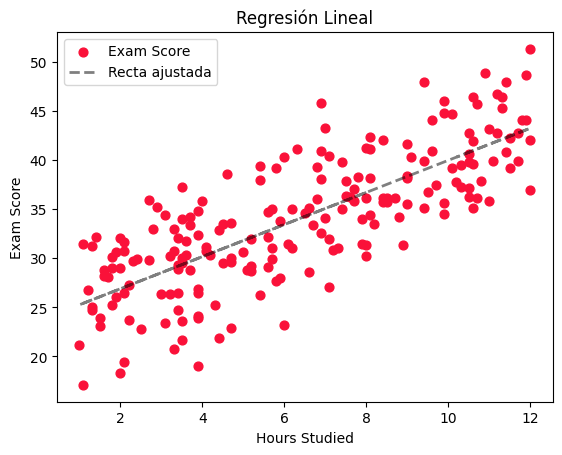


Coeficiente de determinación (R²) = 0.6033

Intervalo de confianza:                        0          1
const          22.300501  24.936374
hours_studied   1.448421   1.819798


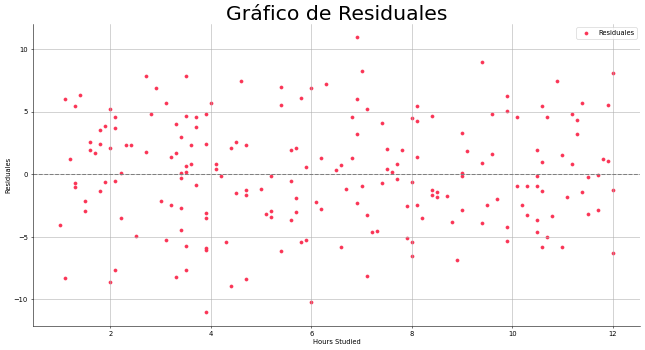

Valor p (Shapiro) = 0.5231100089077523
Valor p de Breusch-Pagan: 0.2986

Predicción para x=5: [31.78898733]
Predicción para x=8: [36.69131702]

ANOVA:
                  df       sum_sq      mean_sq           F        PR(>F)
hours_studied    1.0  5534.762083  5534.762083  301.171566  1.271981e-41
Residual       198.0  3638.732917    18.377439         NaN           NaN


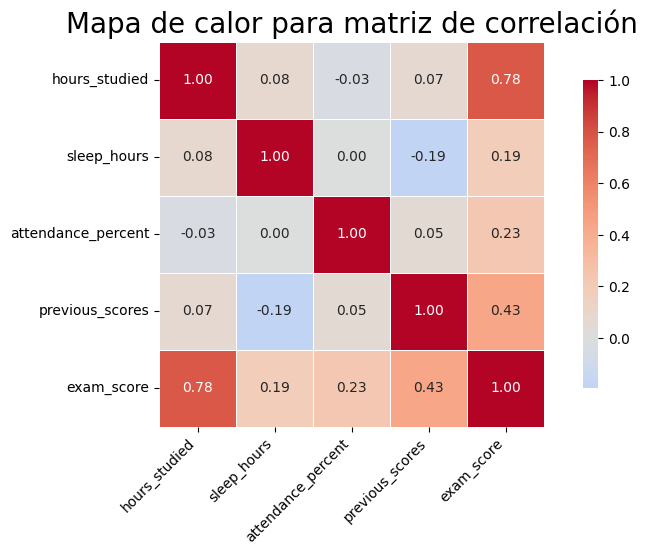

In [ ]:
# Resultados - Correlación

Sxx = ((x - x.mean())**2).sum()
Syy = ((y - y.mean())**2).sum()
Sxy = ((x - x.mean())*(y-y.mean())).sum()

from math import sqrt
r = Sxy/sqrt(Sxx*Syy)
print("Coeficiente de correlación =", round(r,4))
print("Coeficiente de correlación (forma fácil)=", df.corr(numeric_only=True))

from scipy.stats import pearsonr
print("Coeficiente de correlación:", pearsonr(x,y))
print("Coeficiente de determinación:", r**2)


#  Recta de regresión

import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()
print("Parámetros:", modelo.params)

yc = modelo.predict(x_constante)
plt.scatter(x, y, label="Exam Score", color="#FA1139", s=40)
plt.plot(x, yc, color="black", linestyle="--", linewidth=2, alpha=0.5, label="Recta ajustada")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Regresión Lineal")
plt.legend()
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,yc)
print("\nCoeficiente de determinación (R²) =", round(r2,4))


# Intervalo de confianza

intervalo_de_confianza = modelo.conf_int(alpha=0.05)
print("\nIntervalo de confianza:", intervalo_de_confianza)


# Gráfico de residuales

residuales = modelo.resid
plt.figure(figsize=(16,8), dpi=49)
plt.scatter(x, residuales, label="Residuales", color="#FA3455", s=20)
plt.xlabel("Hours Studied")
plt.ylabel("Residuales")
plt.title("Gráfico de Residuales", fontsize=30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
plt.axhline(y=0, color="gray", linestyle="--")
plt.show()


# Normalidad y homocedasticidad

from scipy.stats import shapiro
estadistico_shapiro, valor_p_shapiro = shapiro(residuales)
print("Valor p (Shapiro) =", valor_p_shapiro)

from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f"Valor p de Breusch-Pagan: {valor_p_bp:0.4f}\n")


# Predicciones

print("Predicción para x=5:", modelo.predict([1,5]))
print("Predicción para x=8:", modelo.predict([1,8]))


# Tabla ANOVA

from statsmodels.formula.api import ols
modelo_lineal = ols("exam_score ~ hours_studied", data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
print("\nANOVA:")
print(tabla_anova)


# Mapa de calor

import seaborn as sns

matriz_de_correlacion = df.corr(numeric_only=True)
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(
    matriz_de_correlacion,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink":0.8},
    center=0
)
plt.title("Mapa de calor para matriz de correlación", fontsize=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

# **Conclusión**

El análisis demuestra que existe una relación lineal fuerte y significativa entre las horas de estudio y los puntajes obtenidos en los exámenes. Esto respalda la idea de que a mayor tiempo de preparación, mejor es el rendimiento académico. El modelo de regresión lineal simple resulta adecuado para predecir los puntajes a partir de las horas de estudio.

# **Codigo de Git Hub**
https://github.com/leslie1506/Estadistica2025B.git
